# Rekonstrukcja trójwymiarowego modelu obiektu w oparciu o sekwencję zdjęć przy pomocy STRUCTURE FROM MOTION
### Kacper Leśniara, Filip Dratwiński

In [1]:
from IPython.display import Image
import numpy as np
import open3d as o3d
import cv2 as cv
import glob

## MVS DATASET

In [2]:
Image("../data/raw/dataset.jpg")

FileNotFoundError: No such file or directory: '../data/raw/dataset.jpg'

## Kalibracja

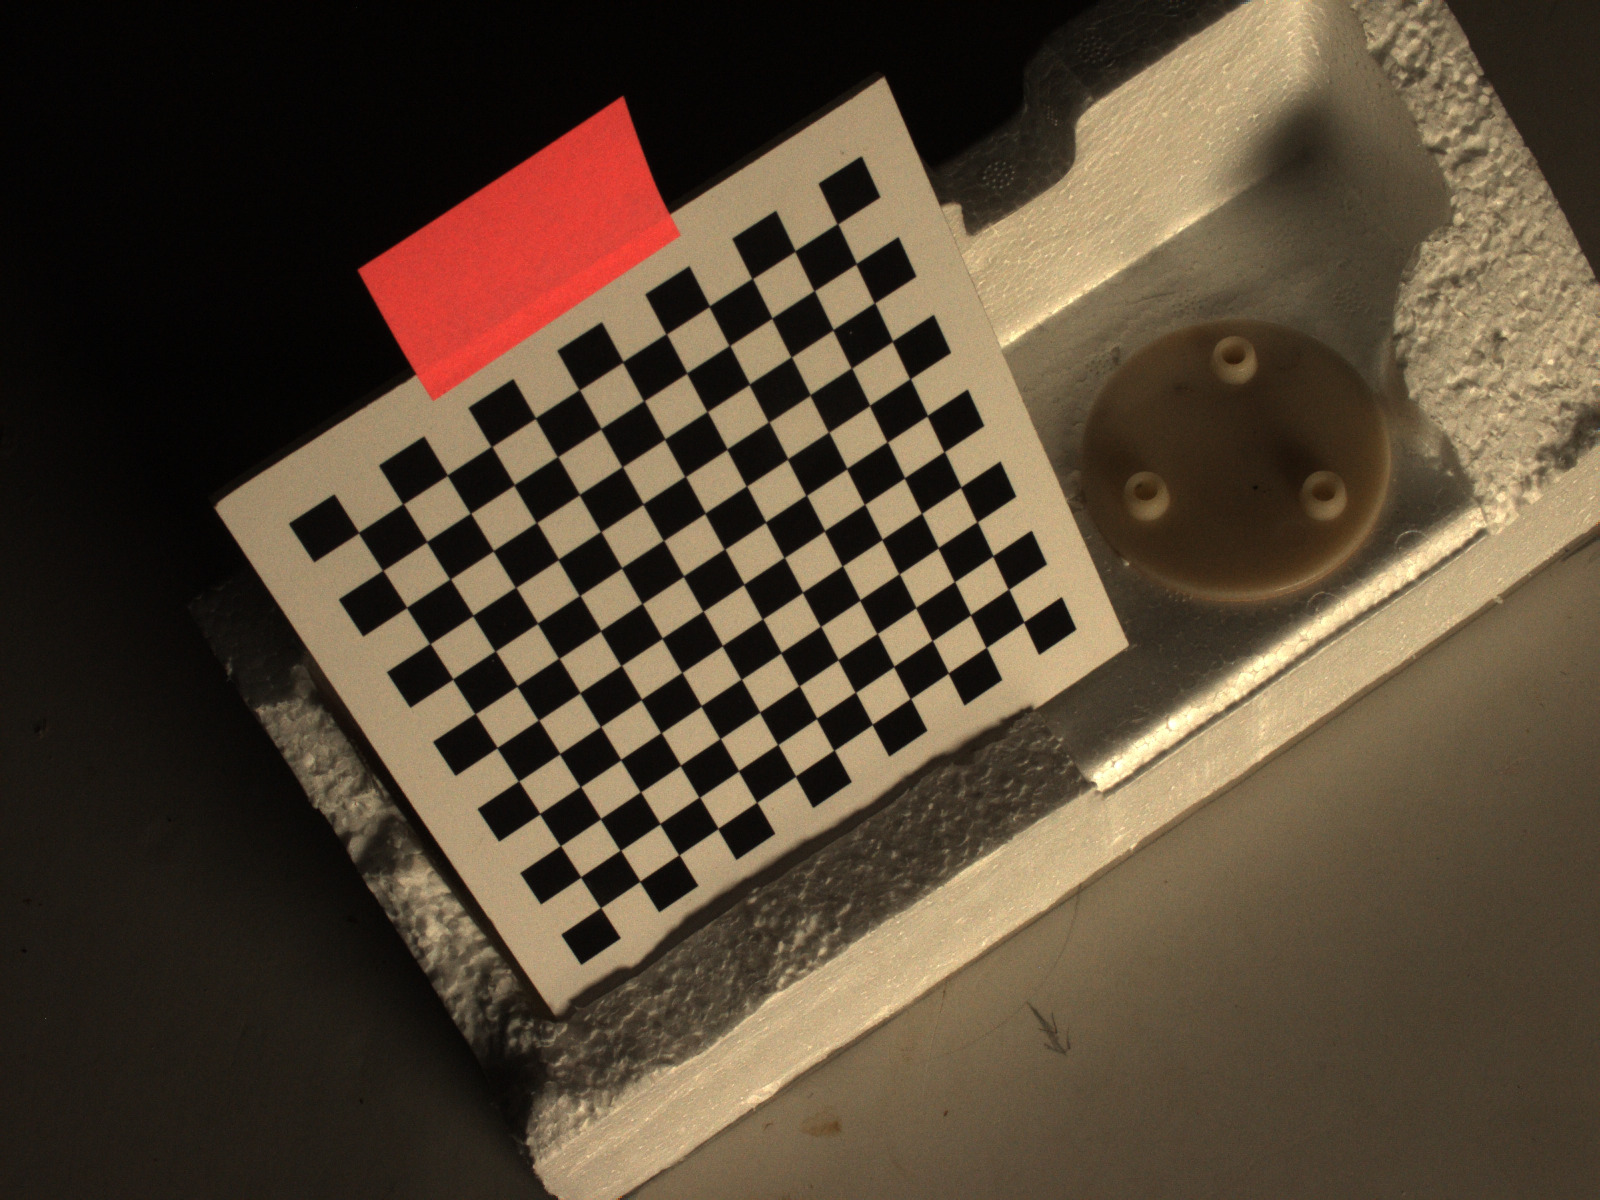

In [9]:
Image("../data/raw/Calibration/cal18/cam_0_002.jpg")

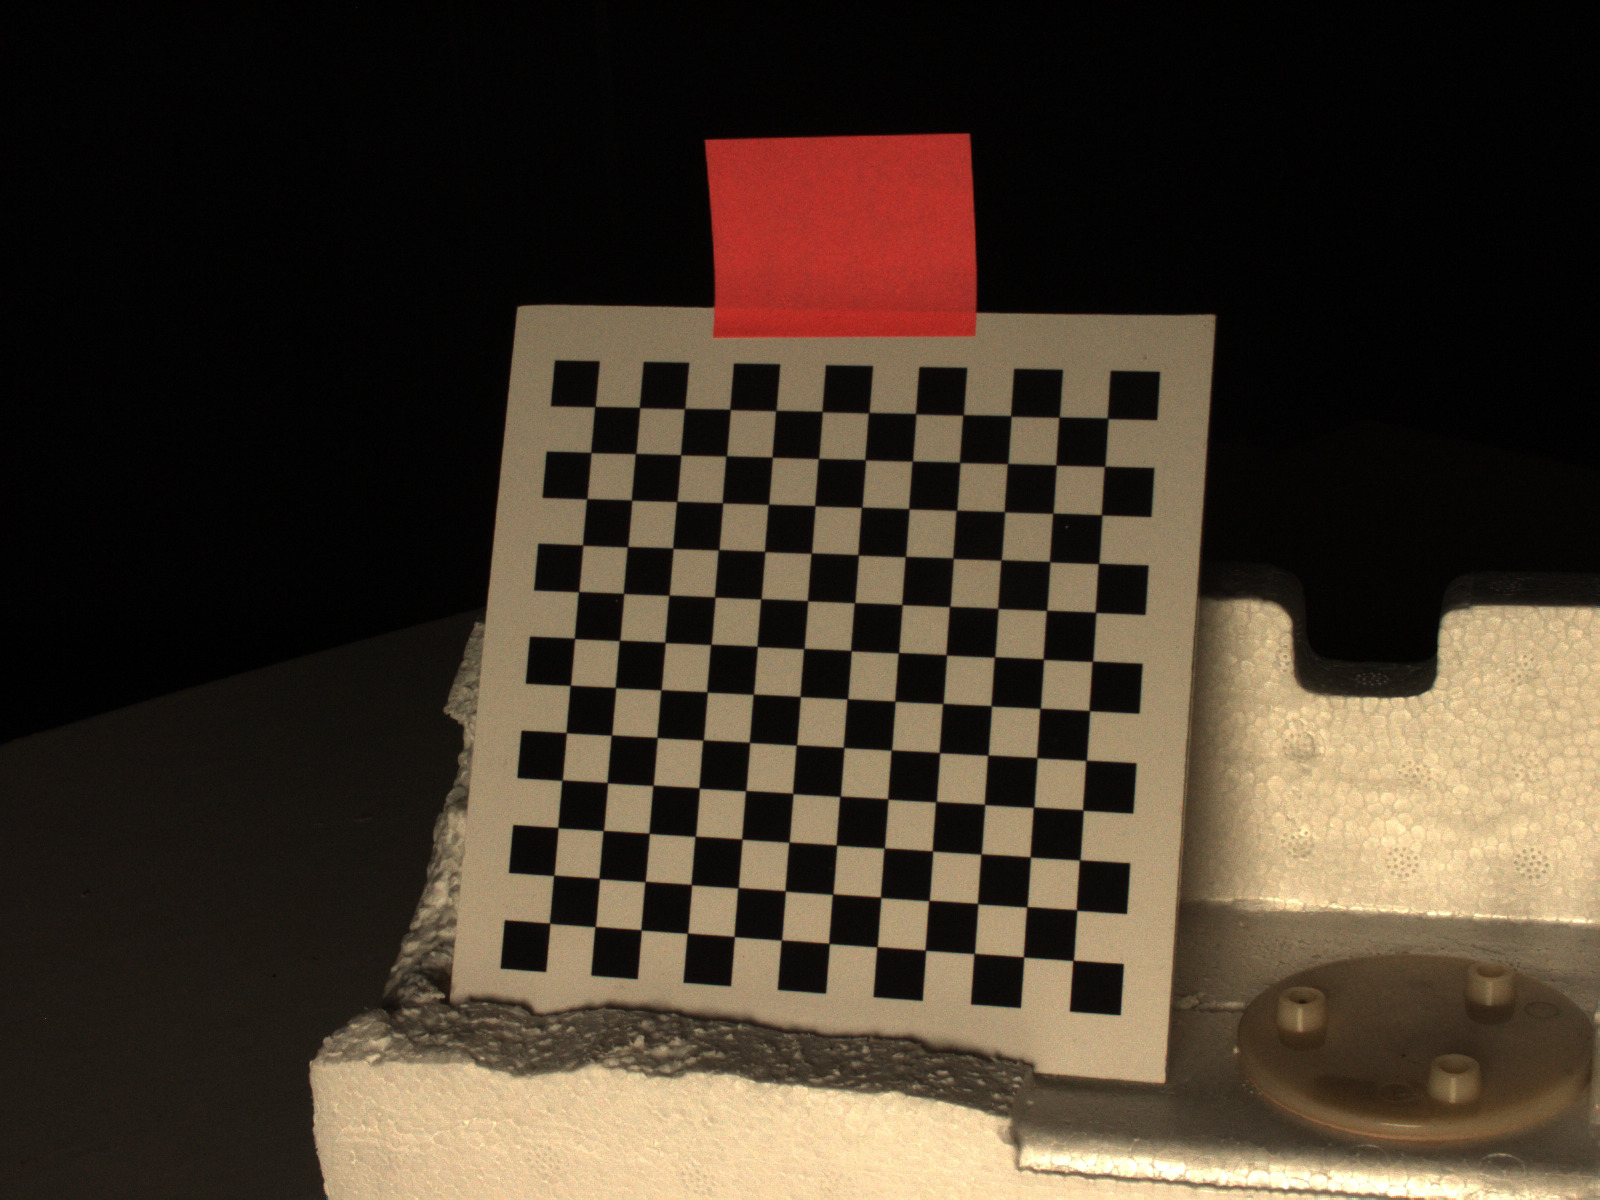

In [10]:
Image("../data/raw/Calibration/cal18/cam_0_035.jpg")

In [10]:
rows = 12
cols = 12
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((cols*rows,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:cols].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('../data/mvs_dataset/calibration/processed/cam_0_001.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (rows,cols), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (rows,cols), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
# cv.imwrite("../data/raw/Calibration/processed.jpg", img)
cv.destroyAllWindows()


In [11]:
cv.destroyAllWindows()

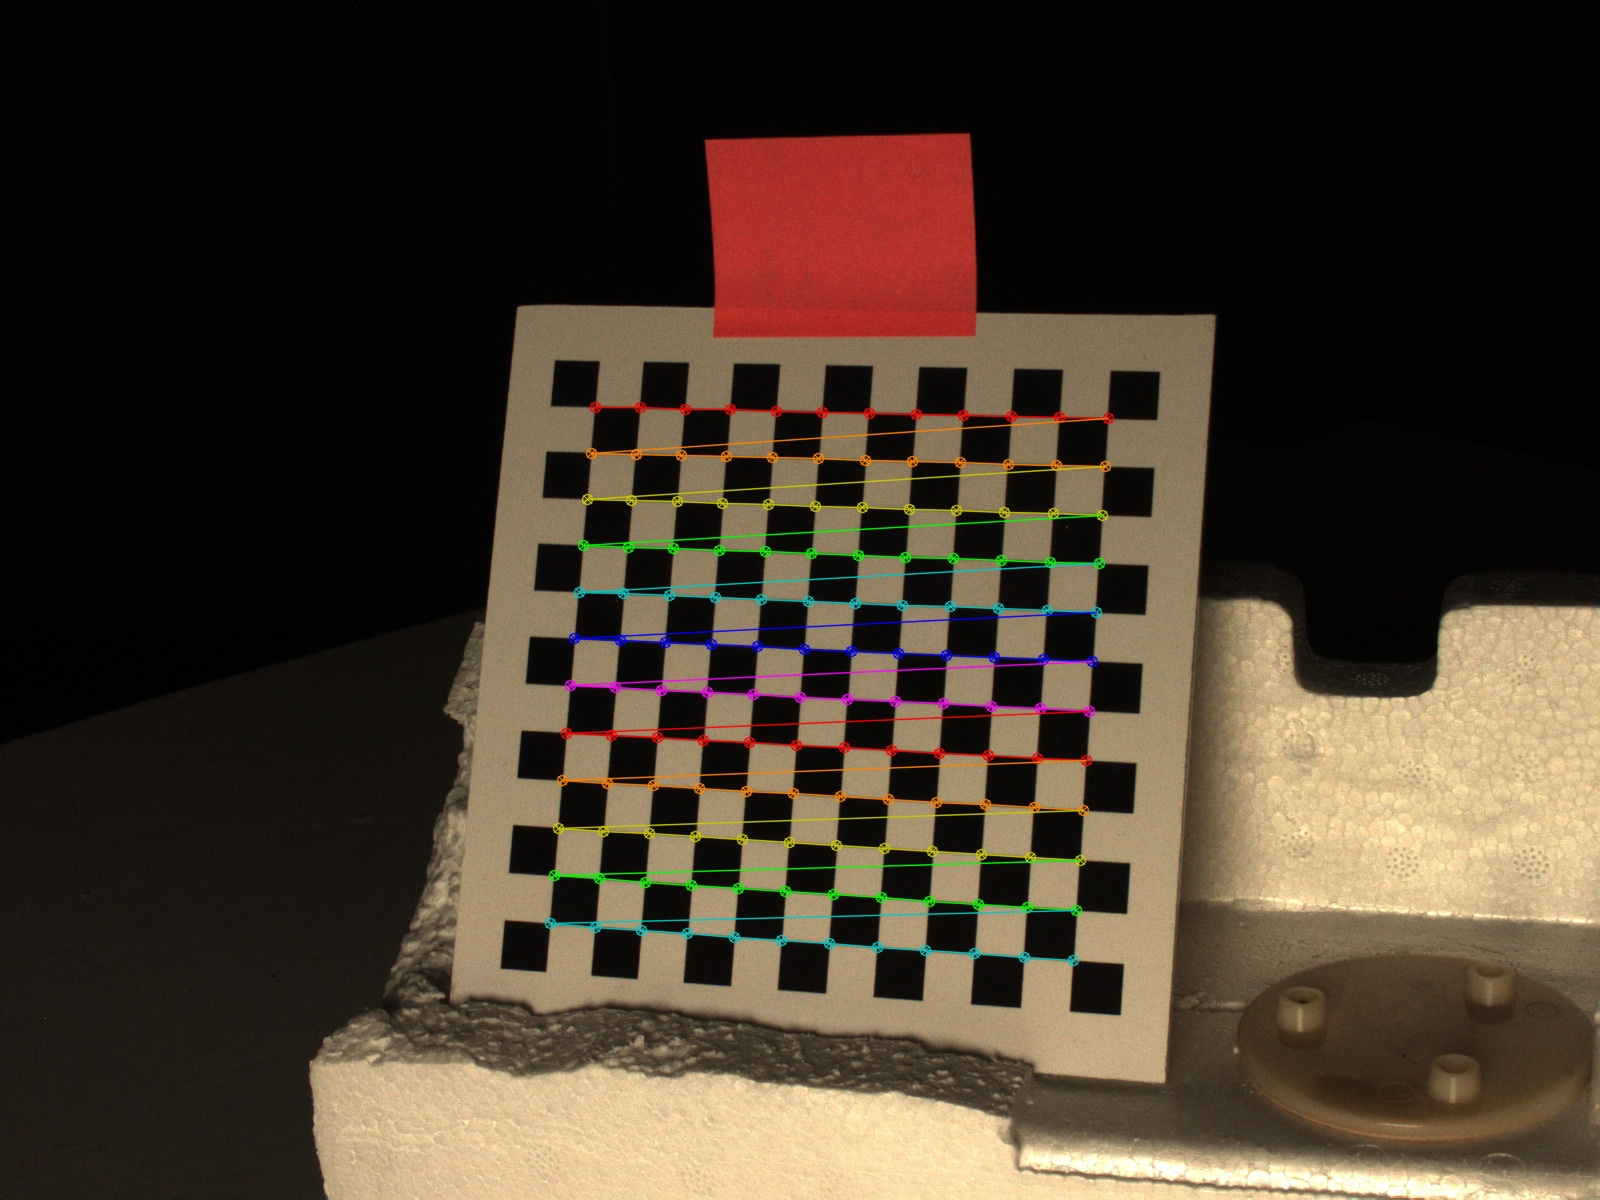

In [19]:
Image("../data/raw/Calibration/processed.jpg")

In [12]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [14]:
img = cv.imread('../data/mvs_dataset/calibration/processed/cam_0_001.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))


In [15]:
newcameramtx

array([[2.85711792e+03, 0.00000000e+00, 8.10057944e+02],
       [0.00000000e+00, 2.82231396e+03, 6.06286451e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

## SFM - from images to textured meshes

### Scan 001

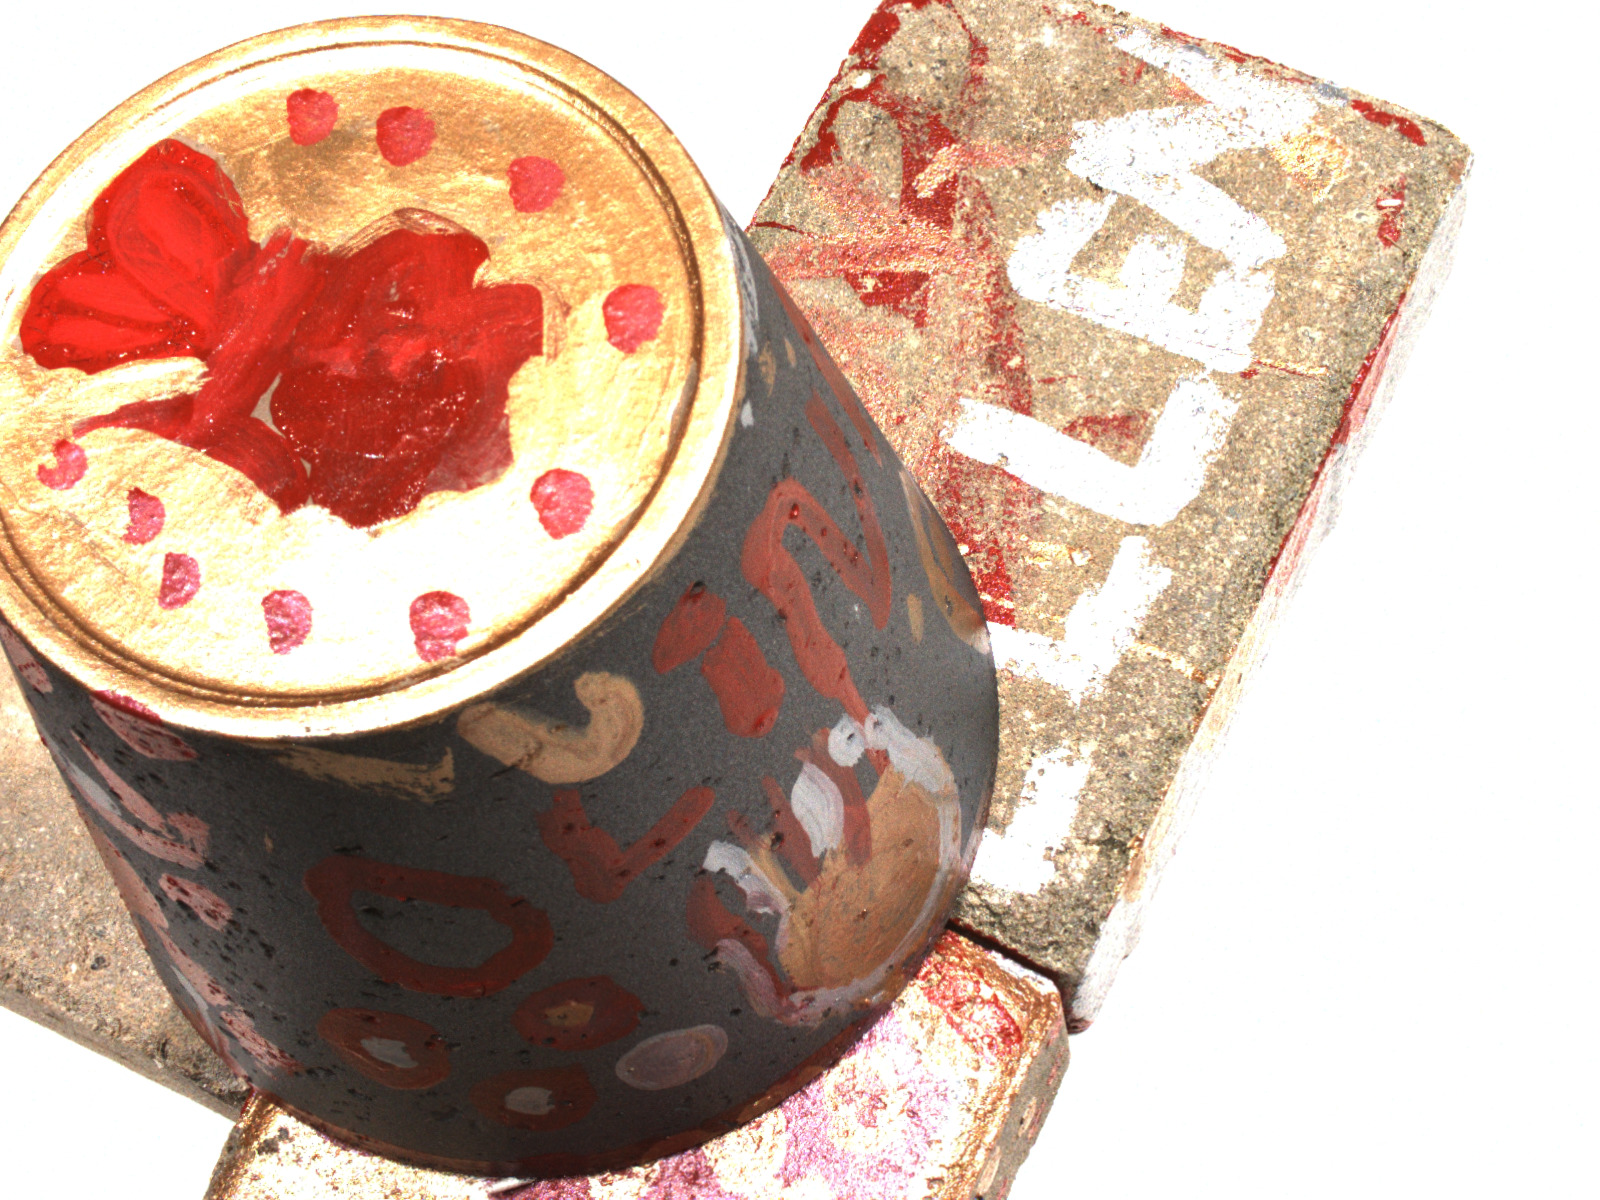

In [23]:
Image("../data/raw/rect_001_max.jpg")

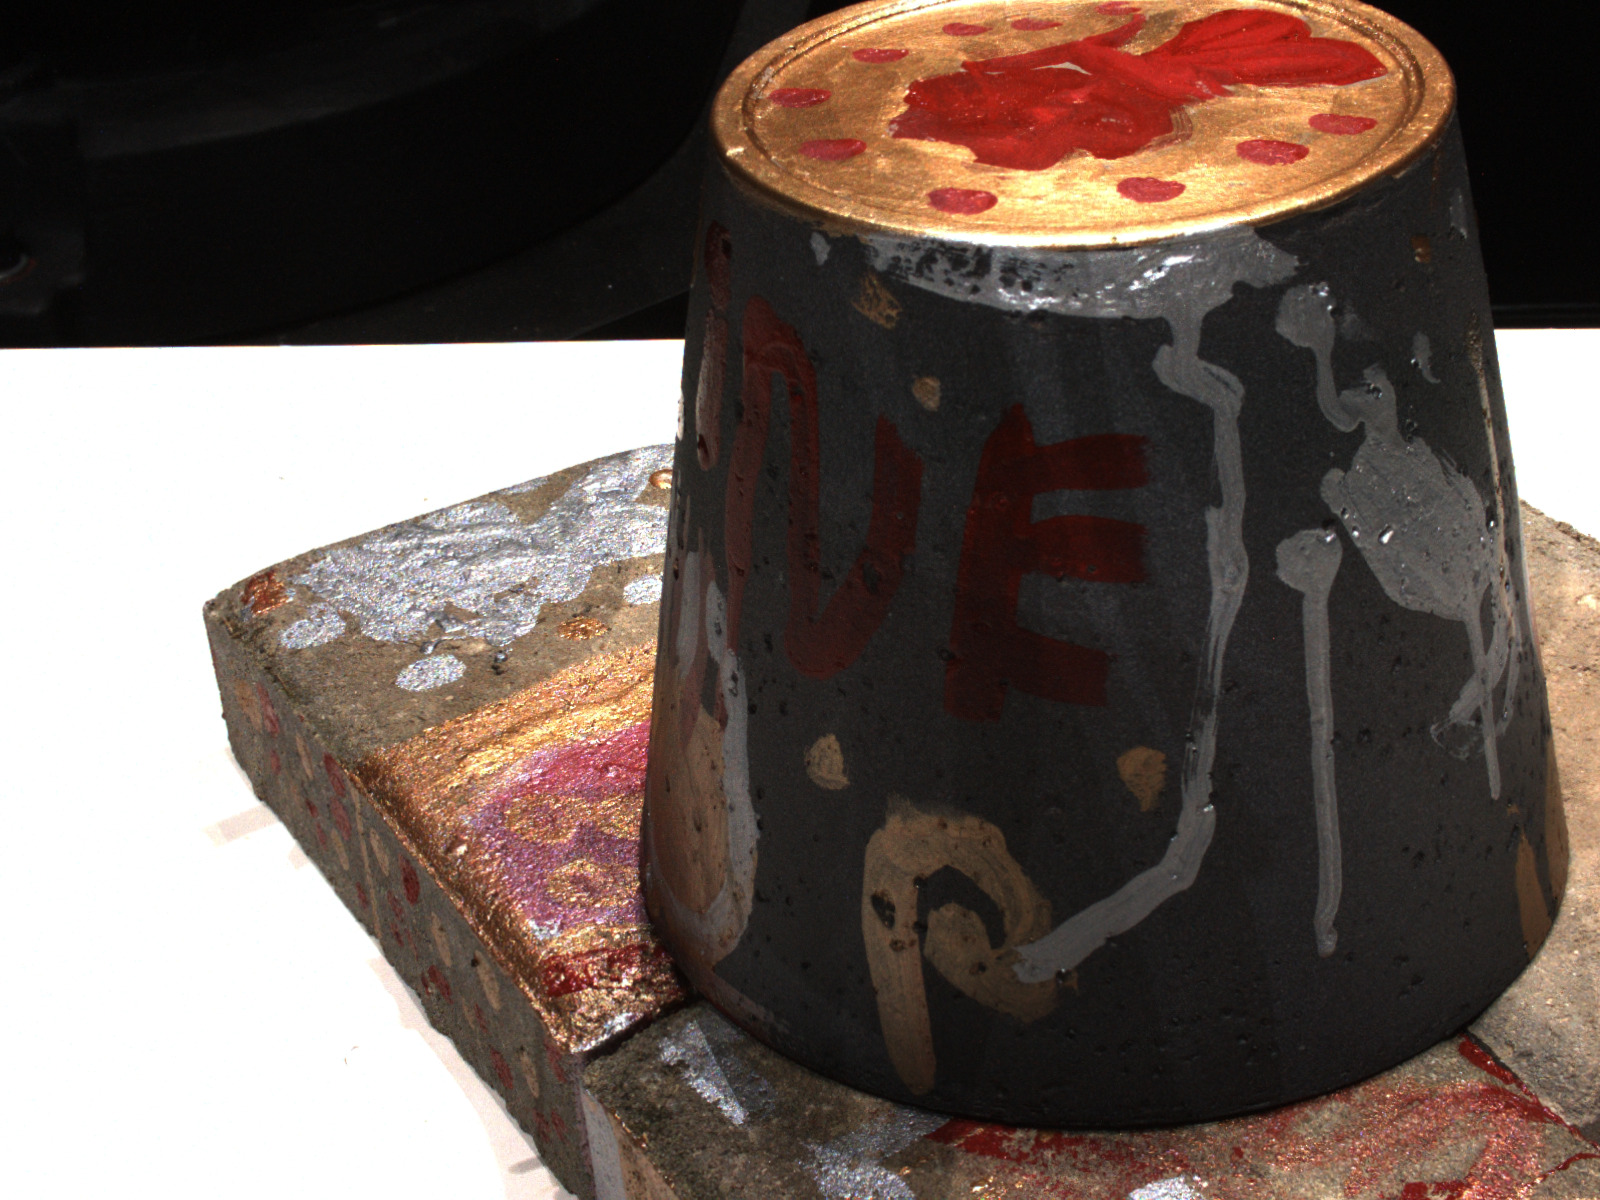

In [24]:
Image("../data/raw/rect_020_max.jpg")

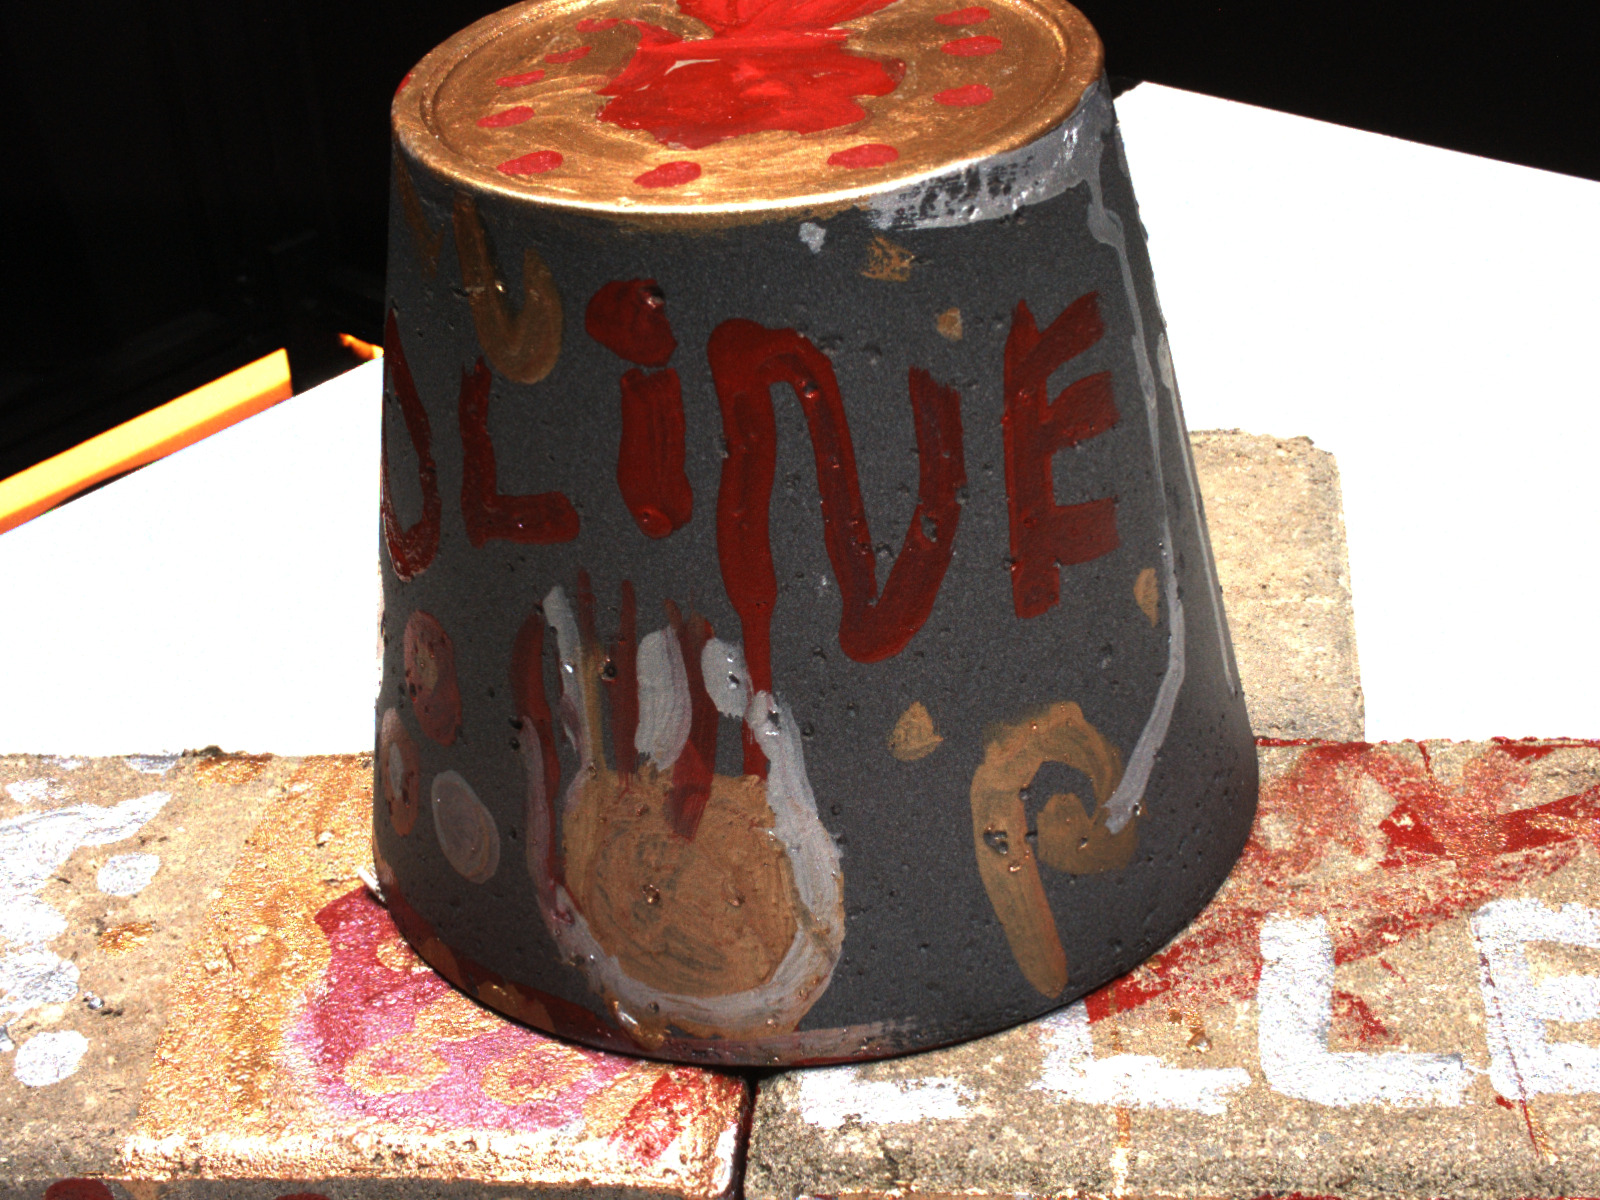

In [25]:
Image("../data/raw/rect_024_max.jpg")

### point clouds

In [2]:
cloud = o3d.io.read_point_cloud("../data/raw/cleaned_images/mvs_scan1/omvs/scene_dense.ply")
# print(cloud)
# print(np.asarray(cloud.points))
o3d.visualization.draw_geometries([cloud])


### mesh

In [3]:
mesh = o3d.io.read_triangle_mesh("../data/raw/cleaned_images/mvs_scan1/omvs/scene_mesh.ply")
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

In [4]:
mesh = o3d.io.read_triangle_mesh("../data/raw/cleaned_images/mvs_scan1/omvs/scene_mesh_refine.ply")
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

### texture

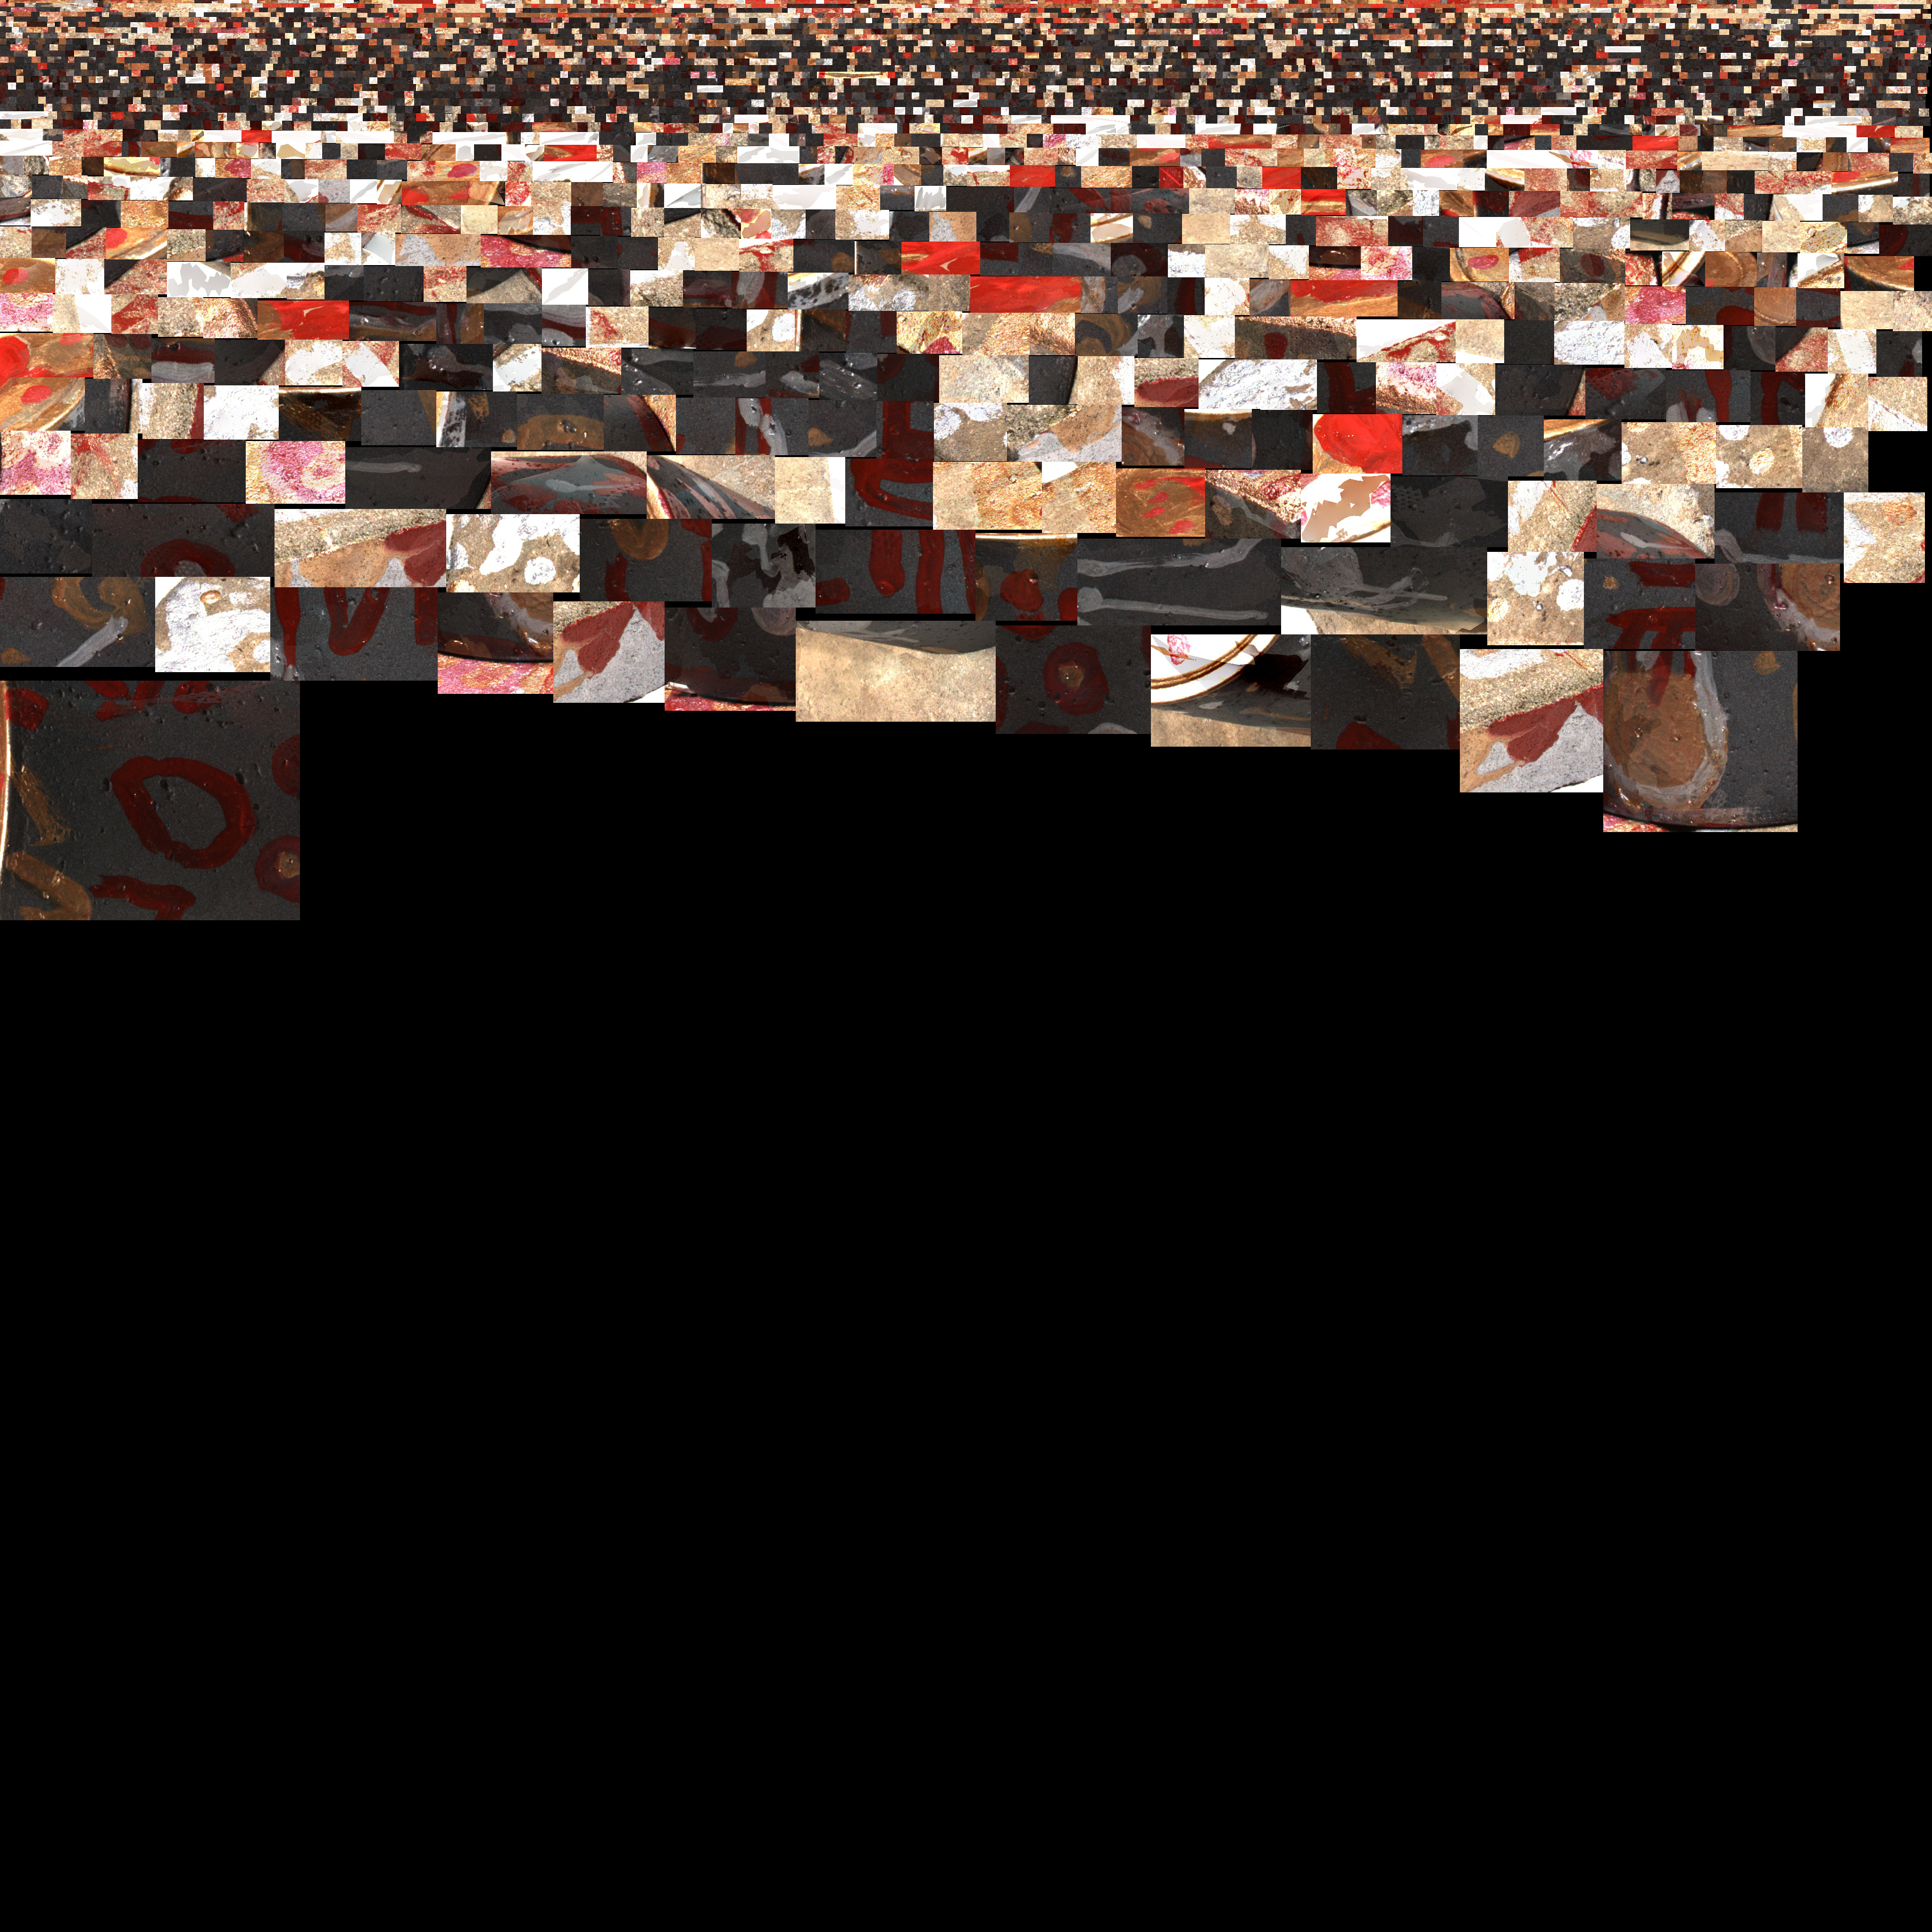

In [6]:
Image("../data/raw/cleaned_images/mvs_scan1/omvs/scene_mesh_refine_texture.jpg")

### textured mesh

In [5]:
mesh = o3d.io.read_triangle_mesh("../data/raw/cleaned_images/mvs_scan1/omvs/scene_mesh_refine_texture.obj")

o3d.visualization.draw_geometries([mesh])

In [ ]:
# mesh_voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=0.02)
# o3d.visualization.draw_geometries([mesh_voxel_grid])

In [ ]:
# docker run -it --rm -v /home/calychas/Windows/D/Projekty/Programowanie/Studia/Semestr9/cv/AOiW_project_3d_modelling/data/raw/cleaned_images/:/Images -v /home/calychas/Windows/D/Projekty/Programowanie/Studia/Semestr9/cv/AOiW_project_3d_modelling/data/raw/openmvg/openMVG_Build/software/SfM/SfM_GlobalPipeline_new.py:/opt/openMVG_Build/software/SfM/SfM_GlobalPipeline.py openmvg /bin/bash
# python /opt/openMVG_Build/software/SfM/SfM_GlobalPipeline.py scan1 mvg_scan1
# docker run -v /home/calychas/Windows/D/Projekty/Programowanie/Studia/Semestr9/cv/AOiW_project_3d_modelling/data/raw/cleaned_images/:/datasets --rm -it spedenaave/dpg pipeline.py --input /datasets/scan1 --output /datasets/mvs_scan1 --sfm-type global --geomodel e --run-openmvg --run-openmvs
# https://github.com/rennu/dpg
# https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
# http://ksimek.github.io/2013/08/13/intrinsic/#:~:text=The%20Pinhole%20Camera,ideal%20pinhole%20camera%2C%20illustrated%20below.&text=Each%20intrinsic%20parameter%20describes%20a%20geometric%20property%20of%20the%20camera.
# :screen-fps=30.000000 :live-caching=300 :screen-top=0 :screen-left=1920 :screen-width=1920 :screen-height=1080

In [ ]:
cloud_voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(cloud, voxel_size=0.02)
o3d.visualization.draw_geometries([cloud_voxel_grid])




In [ ]:
cloud_voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(cloud, voxel_size=0.02)
o3d.visualization.draw_geometries([cloud_voxel_grid])




In [15]:
# mesh_voxel_grid = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, voxel_size=0.02)
# o3d.visualization.draw_geometries([mesh_voxel_grid])

In [ ]:
# docker run -it --rm -v /home/calychas/Windows/D/Projekty/Programowanie/Studia/Semestr9/cv/AOiW_project_3d_modelling/data/raw/cleaned_images/:/Images -v /home/calychas/Windows/D/Projekty/Programowanie/Studia/Semestr9/cv/AOiW_project_3d_modelling/data/raw/openmvg/openMVG_Build/software/SfM/SfM_GlobalPipeline_new.py:/opt/openMVG_Build/software/SfM/SfM_GlobalPipeline.py openmvg /bin/bash
# python /opt/openMVG_Build/software/SfM/SfM_GlobalPipeline.py scan1 mvg_scan1
# docker run -v /home/calychas/Windows/D/Projekty/Programowanie/Studia/Semestr9/cv/AOiW_project_3d_modelling/data/raw/cleaned_images/:/datasets --rm -it spedenaave/dpg pipeline.py --input /datasets/scan1 --output /datasets/mvs_scan1 --sfm-type global --geomodel e --run-openmvg --run-openmvs
# https://github.com/rennu/dpg
# https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html
# http://ksimek.github.io/2013/08/13/intrinsic/#:~:text=The%20Pinhole%20Camera,ideal%20pinhole%20camera%2C%20illustrated%20below.&text=Each%20intrinsic%20parameter%20describes%20a%20geometric%20property%20of%20the%20camera.
# :screen-fps=30.000000 :live-caching=300 :screen-top=0 :screen-left=1920 :screen-width=1920 :screen-height=1080

In [ ]:
cloud_voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(cloud, voxel_size=0.02)
o3d.visualization.draw_geometries([cloud_voxel_grid])


